<table><tbody><tr><th><p><img alt="Emblema" src="https://cdn6.aptoide.com/imgs/6/f/4/6f4821daa840da8fe971445350759fe5_icon.png" style="width:150px;"></p></th><th><p><strong>Inteligencia Artificial</strong></p><p><strong>Grado en Ingeniería Informática en Sistemas de Información – Curso 2024/2025</strong></p><p><strong>ENSEÑANZAS PRÁCTICAS Y DE DESARROLLO</strong></p><h1>EPD 2.2: Machine Learning - Regresión Lineal Multivariable</h1></th></tr></tbody></table>

____

## Objetivos
- Implementación en Python de un algoritmo de Regresión Lineal con múltiples variables y su aplicación a datos.

___

## Bibliografía Básica
- Machine Learning. Tom Mitchell. MacGraw-Hill, 1997

___

Implementar regresión lineal con múltiples variables para predecir los precios de casas. Suponer que queremos vender nuestra casa y queremos saber cuál sería un buen precio de mercado. Una opción sería recolectar información de ventas de casas recientes y crear un modelo de precios de casas.

El fichero ex1data2.txt contiene un conjunto de entrenamiento de precios de casas en una ciudad estadounidense. La primera columna corresponde con el tamaño de la casa (en pies cuadrados), la segunda columna indica el número de dormitorios, y la tercera el precio de la casa.

Antes de nada, muestra las diez primeras filas de datos y a continuación:

1. Implementar una función para normalizar los datos de la matriz X que utilice la desviación estándar.
2. Si la función de coste implementada en la práctica anterior no se puede utilizar para múltiples variables, codificar una nueva. En este caso también hay que añadir una primera columna a la matriz X con todos sus elementos a 1.
3. Lo mismo ocurre con el método del gradiente, ver si se puede reutilizar o hay que implementar uno nuevo.
4. Mostrar el gráfico de convergencia que se observa en la figura obtenido con alpha igual a 0.03 y 200 iteraciones.
5. Predecir el precio de una casa de 1650 pies
cuadrados y 3 habitaciones.
6. Calcular los parámetros theta mediante el uso de la ecuación normal, y predecir nuevamente el precio de la vivienda con los valores anteriores.

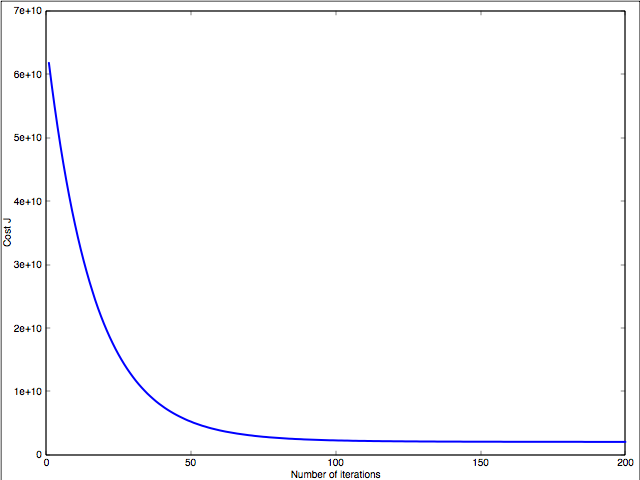

In [1]:
#librerías (comunes a todos los ejercicios)
import pandas as pd
import numpy as np
import sklearn.linear_model
import matplotlib.pyplot as plt
from computeCostMulti import computeCostMulti
from featureNormalize import featureNormalize
from gradientDescentMulti import gradientDescentMulti
from normalEqn import normalEqn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn import metrics

In [2]:
# Función lectura fichero
def read_file(ruta):
    file = pd.read_csv(ruta, names=["pies2","habitaciones","precio"],delimiter=',')
    X = pd.DataFrame({'pies2': file['pies2'],'habitaciones': file['habitaciones']})
    y = pd.DataFrame({'precio': file['precio']})
    return X, y

X, y = read_file("ex1data2.txt")

In [3]:
# Mostrar las 10 primeras filas del dataset (tanto de X como de y)
display(X.head(10))

,pies2,habitaciones
0,2104,3
1,1600,3
2,2400,3
3,1416,2
4,3000,4
5,1985,4
6,1534,3
7,1427,3
8,1380,3
9,1494,3


In [4]:
# 1. NORMALIZAR LOS DATOS CON LA DESVIACIÓN ESTÁNDAR
X, mu, sigma = featureNormalize(X)
display(X.head(10))
print("Media: ", mu, "\n Std:", sigma)

,pies2,habitaciones
0,0.130010,-0.223675
1,-0.504190,-0.223675
2,0.502476,-0.223675
3,-0.735723,-1.537767
4,1.257476,1.090417
5,-0.019732,1.090417
6,-0.587240,-0.223675
7,-0.721881,-0.223675
8,-0.781023,-0.223675
9,-0.637573,-0.223675


Media:  pies2           2000.680851
habitaciones       3.170213
dtype: float64 
 Std: pies2           794.702354
habitaciones      0.760982
dtype: float64


In [5]:
# 2. CODIFICAR NUEVA FUNCIÓN DE COSTE (EN COMPUTECOSTMULTI.PY) Y AÑADIR COLUMNA DE UNOS
ones = np.ones((len(y),1))
X['ones'] = ones
X = X[['ones', 'pies2', 'habitaciones']]
display(X)

,ones,pies2,habitaciones
0,1.0,0.130010,-0.223675
1,1.0,-0.504190,-0.223675
2,1.0,0.502476,-0.223675
3,1.0,-0.735723,-1.537767
4,1.0,1.257476,1.090417
5,1.0,-0.019732,1.090417
6,1.0,-0.587240,-0.223675
7,1.0,-0.721881,-0.223675
8,1.0,-0.781023,-0.223675
9,1.0,-0.637573,-0.223675


In [6]:
# 3. DESCENSO DEL GRADIENTE
alpha = 0.03
iterations = 200

# Inicializar thetas
theta = np.zeros((3,1))
print("Coste inicial: ", computeCostMulti(X, y, theta))
theta, J_history = gradientDescentMulti(X, y, theta, alpha, iterations)

Coste inicial:  precio    6.559155e+10
dtype: float64


C:\Users\danit\anaconda3\envs\entornoIA2425\lib\site-packages\matplotlib\cbook.py:1762: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
C:\Users\danit\anaconda3\envs\entornoIA2425\lib\site-packages\matplotlib\cbook.py:1398: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return np.asarray(x, float)


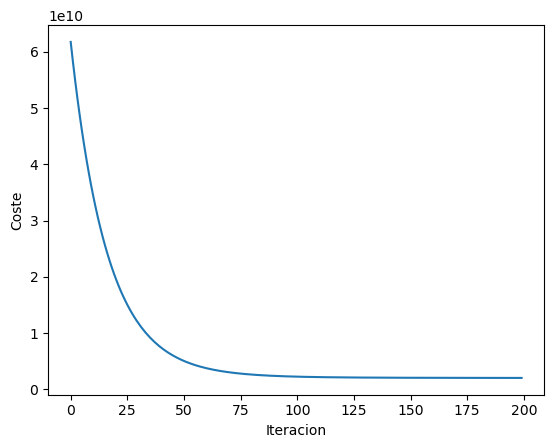

In [7]:
# 4. GRÁFICO DE CONVERGENCIA Y MOSTRAR LOS VALORES THETA
plt.plot(J_history['iter'], J_history['coste'])
plt.xlabel("Iteracion")
plt.ylabel("Coste")
plt.show()

In [8]:
# 5. PREDECIR EL PRECIO DE UNA CASA DE 1650 PIES CUADRADOS Y 3 HABITACIONES
precio = np.dot([1, (1650-mu['pies2'])/sigma['pies2'],(3-mu['habitaciones'])/sigma['habitaciones']], theta)
print("El precio es de: ",precio)

El precio es de:  [293261.55145346]


In [9]:
# 6. ECUACIÓN NORMAL
X, y = read_file("ex1data2.txt")
ones = np.ones((len(y),1))
X['ones'] = ones
X = X[['ones', 'pies2', 'habitaciones']]

theta = np.zeros((3,1))

theta = normalEqn(X, y)
precio_eqn = np.dot([1, 1650, 3], theta)
print("El precio EQN es de: ",precio_eqn)

El precio EQN es de:  [293081.46433499]


## Problemas

#### PROBLEMA 01.
En el caso de estudio utilizado en los ejercicios anteriores, probar con diferentes valores de alpha, como por ejemplo 0.3, 0.1, 0.03, 0.01,… usando la normalización de los datos con desviación estándar (Ejercicio 1). Representar los gráficos de convergencia (Ejercicio 4) y comparar los diferentes resultados obtenidos. Finalmente, utilizar los mejores valores de theta para predecir el precio de una casa de 1650 pies cuadrados y 3 habitaciones. Además, se podrían comparar estos resultados con los obtenidos en la ampliación de problemas de la práctica anterior aplicando regresión lineal con una solo variable.

##### Solución:

C:\Users\danit\OneDrive - Universidad Pablo de Olavide de Sevilla\UNI\4º_Curso\1º Semestre\IA\Github\IA\EPD\EPD2_2\gradientDescentMulti.py:22: RuntimeWarning: invalid value encountered in subtract
  theta = theta - alpha * (1/m)*(np.dot(X.T, (h-y)))
C:\Users\danit\anaconda3\envs\entornoIA2425\lib\site-packages\matplotlib\cbook.py:1762: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
C:\Users\danit\anaconda3\envs\entornoIA2425\lib\site-packages\matplotlib\cbook.py:1398: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return np.asarray(x, float)


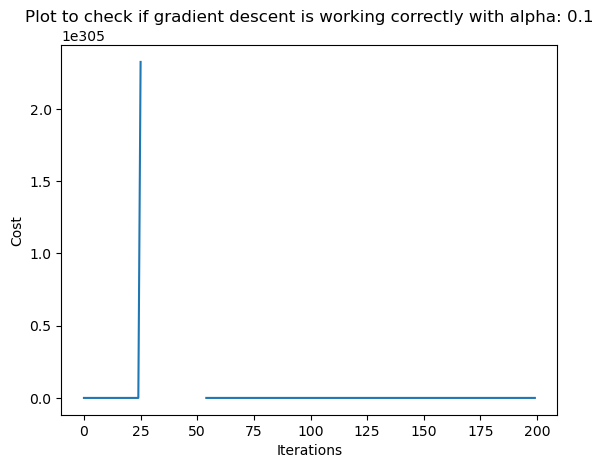

C:\Users\danit\OneDrive - Universidad Pablo de Olavide de Sevilla\UNI\4º_Curso\1º Semestre\IA\Github\IA\EPD\EPD2_2\gradientDescentMulti.py:22: RuntimeWarning: invalid value encountered in subtract
  theta = theta - alpha * (1/m)*(np.dot(X.T, (h-y)))
C:\Users\danit\anaconda3\envs\entornoIA2425\lib\site-packages\matplotlib\cbook.py:1762: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
C:\Users\danit\anaconda3\envs\entornoIA2425\lib\site-packages\matplotlib\cbook.py:1398: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return np.asarray(x, float)


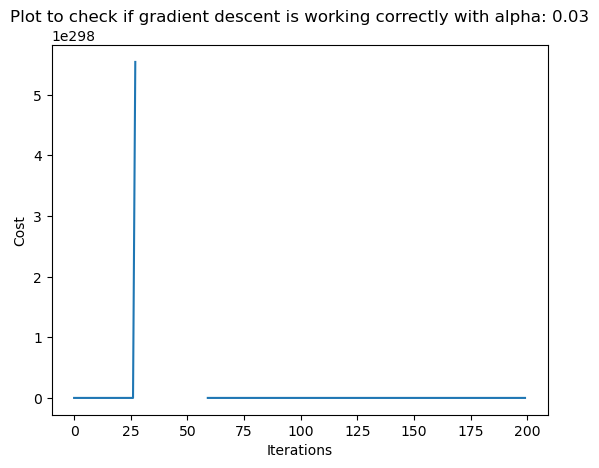

C:\Users\danit\OneDrive - Universidad Pablo de Olavide de Sevilla\UNI\4º_Curso\1º Semestre\IA\Github\IA\EPD\EPD2_2\gradientDescentMulti.py:22: RuntimeWarning: invalid value encountered in subtract
  theta = theta - alpha * (1/m)*(np.dot(X.T, (h-y)))
C:\Users\danit\anaconda3\envs\entornoIA2425\lib\site-packages\matplotlib\cbook.py:1762: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
C:\Users\danit\anaconda3\envs\entornoIA2425\lib\site-packages\matplotlib\cbook.py:1398: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return np.asarray(x, float)


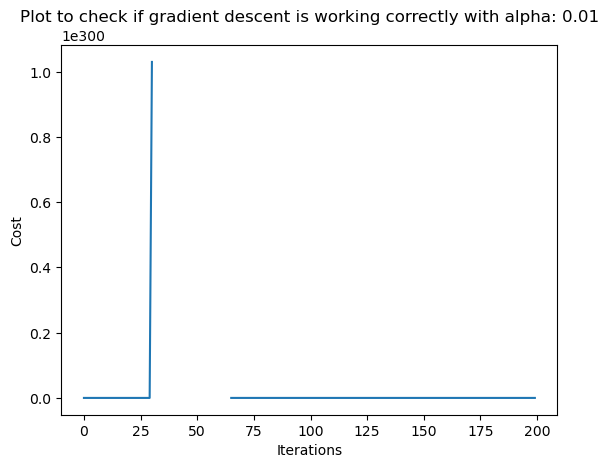

C:\Users\danit\OneDrive - Universidad Pablo de Olavide de Sevilla\UNI\4º_Curso\1º Semestre\IA\Github\IA\EPD\EPD2_2\gradientDescentMulti.py:22: RuntimeWarning: invalid value encountered in subtract
  theta = theta - alpha * (1/m)*(np.dot(X.T, (h-y)))
C:\Users\danit\anaconda3\envs\entornoIA2425\lib\site-packages\matplotlib\cbook.py:1762: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
C:\Users\danit\anaconda3\envs\entornoIA2425\lib\site-packages\matplotlib\cbook.py:1398: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return np.asarray(x, float)


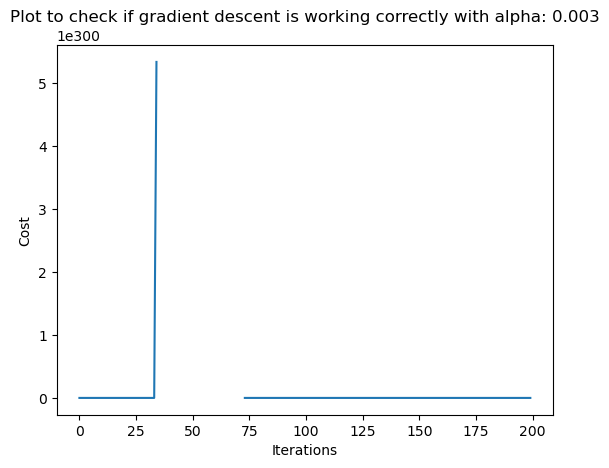

C:\Users\danit\OneDrive - Universidad Pablo de Olavide de Sevilla\UNI\4º_Curso\1º Semestre\IA\Github\IA\EPD\EPD2_2\gradientDescentMulti.py:22: RuntimeWarning: invalid value encountered in subtract
  theta = theta - alpha * (1/m)*(np.dot(X.T, (h-y)))
C:\Users\danit\anaconda3\envs\entornoIA2425\lib\site-packages\matplotlib\cbook.py:1762: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
C:\Users\danit\anaconda3\envs\entornoIA2425\lib\site-packages\matplotlib\cbook.py:1398: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return np.asarray(x, float)


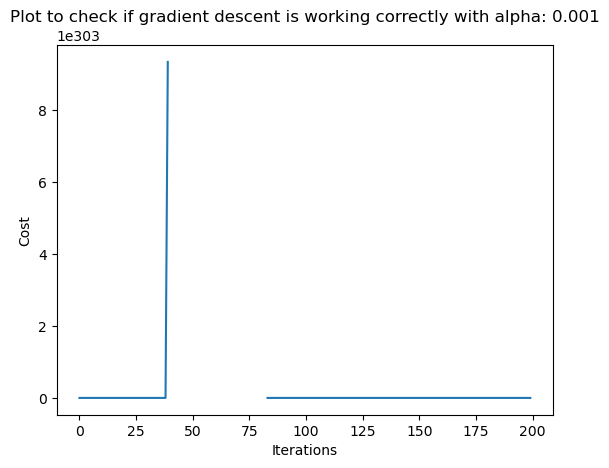

In [10]:
def plotIterationsVsCost(J_history, alpha):
    plt.plot(J_history['iter'], J_history['coste'])
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Plot to check if gradient descent is working correctly with alpha: '+str(alpha))
    plt.show()
    
vecAlpha = [0.1, 0.03, 0.01, 0.003, 0.001]
theta_mejor = np.zeros((3,1))
iterations = 200
for i in range(len(vecAlpha)):
    alpha = vecAlpha[i]
    theta = np.zeros((3,1))
    
    theta_opt, J_history = gradientDescentMulti(X, y, theta, alpha, iterations)
    plotIterationsVsCost(J_history, alpha)
    
    if computeCostMulti(X, y, theta_opt).item() < computeCostMulti(X, y, theta_mejor).item():
        theta_mejor = theta_opt

#### PROBLEMA 02.
Se va a utilizar la librería scikit learn (también conocida como sklearn) para dividir en dos partes los conjuntos de datos X e y de ex1data2.txt: una parte será el conjunto de entrenamiento y otro de test, contiendo el primero el 70% de los ejemplos elegidos aleatoriamente, mientras que el segundo contendrá el resto. Para ello utilizar la función train_test_split().

Al finalizar deberías tener Xtrain, Xtest, ytrain e ytest.


##### Solución:

In [11]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

print("Xtrain shape:", Xtrain.shape)
print("Xtest shape:", Xtest.shape)
print("ytrain shape:", ytrain.shape)
print("ytest shape:", ytest.shape)

Xtrain shape: (32, 3)
Xtest shape: (15, 3)
ytrain shape: (32, 1)
ytest shape: (15, 1)
